<a href="https://colab.research.google.com/github/Jinit-Yadav/DigitalGrammar/blob/main/Pratham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Java and Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init()


tar: spark-3.4.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


Exception: Unable to find py4j in /content/spark-3.4.1-bin-hadoop3/python, your SPARK_HOME may not be configured correctly

In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file selector — choose sample_data.csv

Saving sample_data.csv to sample_data.csv


In [ ]:
df = spark.read.csv("sample_data.csv", header=True, inferSchema=True)

NameError: name 'spark' is not defined

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving prathams_data.csv to prathams_data.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('prathams_data.csv')

# Preview
print(df.head())


   OrderID         Category   Sales  Profit
0        1       Technology  1200.0   300.0
1        2  Office Supplies   200.0    50.0
2        3        Furniture   850.0   150.0
3        4       Technology  1400.0   400.0
4        5        Furniture   300.0    30.0


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('prathams_data.csv')

# Preview first 5 rows
print("First 5 rows:")
print(df.head())

# Show structure (data types and non-null counts)
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Count of distinct values in 'Category' column (if it exists)
if 'Category' in df.columns:
    print("\nDistinct Categories:")
    print(df['Category'].unique())
    print("\nCategory Value Counts:")
    print(df['Category'].value_counts())
else:
    print("\nColumn 'Category' not found in the dataset.")

# Grouping and aggregation on 'Category' (if 'Sales' column exists)
if 'Category' in df.columns and 'Sales' in df.columns:
    print("\nGroup by Category: Avg Sales and Sales StdDev")
    print(df.groupby('Category')['Sales'].agg(['mean', 'std']))
else:
    print("\n'Category' or 'Sales' column not found for group aggregation.")

# Filtering records where Sales > 1000
if 'Sales' in df.columns:
    print("\nFiltered Records (Sales > 1000):")
    print(df[df['Sales'] > 1000])
else:
    print("\n'Sales' column not found for filtering.")

# Correlation between Sales and Profit (if both exist)
if 'Sales' in df.columns and 'Profit' in df.columns:
    correlation = df['Sales'].corr(df['Profit'])
    print("\nCorrelation between Sales and Profit:", correlation)
else:
    print("\n'Sales' and/or 'Profit' column not found for correlation.")

First 5 rows:
   OrderID         Category   Sales  Profit
0        1       Technology  1200.0   300.0
1        2  Office Supplies   200.0    50.0
2        3        Furniture   850.0   150.0
3        4       Technology  1400.0   400.0
4        5        Furniture   300.0    30.0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OrderID   10 non-null     int64  
 1   Category  10 non-null     object 
 2   Sales     9 non-null      float64
 3   Profit    9 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 452.0+ bytes
None

Summary Statistics:
         OrderID   Category        Sales      Profit
count   10.00000         10     9.000000    9.000000
unique       NaN          3          NaN         NaN
top          NaN  Furniture          NaN         NaN
freq         NaN          4          NaN         NaN
mean     5.50000 

In [ ]:
!pip install pyspark

In [ ]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when

# Create Spark Session
spark = SparkSession.builder.appName("EDA_Experiment").getOrCreate()

# Load dataset from uploaded file
df = spark.read.csv("prathams_data.csv", header=True, inferSchema=True)

# Show basic structure
df.printSchema()
df.show(5)

# Summary statistics
df.describe().show()

# Checking for missing values
missing_data = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_data.show()

# Count of distinct values in a column
if 'Category' in df.columns:
    df.select("Category").distinct().show()
    df.groupBy("Category").agg(mean("Sales").alias("Avg_Sales"), stddev("Sales").alias("Sales_StdDev")).show()
else:
    print("Column 'Category' not found.")

# Filtering records
if 'Sales' in df.columns:
    df.filter(col("Sales") > 1000).show()
else:
    print("Column 'Sales' not found.")

# Correlation between two columns (if numerical)
if 'Sales' in df.columns and 'Profit' in df.columns:
    correlation = df.stat.corr("Sales", "Profit")
    print("Correlation between Sales and Profit:", correlation)
else:
    print("Columns 'Sales' and/or 'Profit' not found.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/spark-3.4.1-bin-hadoop3/./bin/spark-submit'

In [ ]:
# Install Java 11
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# Download and install Spark 3.4.1 with Hadoop 3
!wget -q https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

# Install findspark
!pip install -q findspark


tar: spark-3.4.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!rm -f spark-3.4.1-bin-hadoop3.tgz


In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

In [ ]:
!ls -lh spark-3.4.1-bin-hadoop3.tgz


ls: cannot access 'spark-3.4.1-bin-hadoop3.tgz': No such file or directory


In [ ]:
!wget https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

--2025-07-14 15:32:29--  https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-14 15:32:29 ERROR 404: Not Found.



In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

--2025-07-14 15:32:54--  https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388341449 (370M) [application/x-gzip]
Saving to: ‘spark-3.4.1-bin-hadoop3.tgz’

spark-3.4.1-bin-had 100%[===================>] 370.35M  18.7MB/s    in 16s     

2025-07-14 15:33:10 (23.5 MB/s) - ‘spark-3.4.1-bin-hadoop3.tgz’ saved [388341449/388341449]



In [ ]:
!tar -xvzf spark-3.4.1-bin-hadoop3.tgz

spark-3.4.1-bin-hadoop3/
spark-3.4.1-bin-hadoop3/R/
spark-3.4.1-bin-hadoop3/R/lib/
spark-3.4.1-bin-hadoop3/R/lib/sparkr.zip
spark-3.4.1-bin-hadoop3/R/lib/SparkR/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/R.css
spark-3.4.1-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.4.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/aliases.rds
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/AnIndex
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/SparkR.rdx
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/SparkR.rdb
spark-3.4.1-bin-hadoop3/R/lib/SparkR/help/paths.rds
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/worker.R
spark-3.4.1-bin-hadoop3/R/lib/SparkR/worker/daemon.R
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/testthat/
spark-3.4.1-bin-hadoop3/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.4.1-bin-hadoop3/R/lib/S

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("EDA_Experiment") \
    .getOrCreate()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving My_data.csv to My_data.csv


In [ ]:
df = spark.read.csv("prathams_data.csv", header=True, inferSchema=True)
df.show(5)

+-------+---------------+-----+------+
|OrderID|       Category|Sales|Profit|
+-------+---------------+-----+------+
|      1|     Technology| 1200|   300|
|      2|Office Supplies|  200|    50|
|      3|      Furniture|  850|   150|
|      4|     Technology| 1400|   400|
|      5|      Furniture|  300|    30|
+-------+---------------+-----+------+
only showing top 5 rows



In [ ]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when

# Create Spark Session
spark = SparkSession.builder.appName("EDA_Experiment").getOrCreate()

# Load dataset from uploaded file
df = spark.read.csv("prathams_data.csv", header=True, inferSchema=True)

# Show basic structure
df.printSchema()
df.show(5)

# Summary statistics
df.describe().show()

# Checking for missing values
missing_data = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_data.show()

# Count of distinct values in a column
if 'Category' in df.columns:
    df.select("Category").distinct().show()
    df.groupBy("Category").agg(mean("Sales").alias("Avg_Sales"), stddev("Sales").alias("Sales_StdDev")).show()
else:
    print("Column 'Category' not found.")

# Filtering records
if 'Sales' in df.columns:
    df.filter(col("Sales") > 1000).show()
else:
    print("Column 'Sales' not found.")

# Correlation between two columns (if numerical)
if 'Sales' in df.columns and 'Profit' in df.columns:
    correlation = df.stat.corr("Sales", "Profit")
    print("Correlation between Sales and Profit:", correlation)
else:
    print("Columns 'Sales' and/or 'Profit' not found.")

root
 |-- OrderID: integer (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sales: integer (nullable = true)
 |-- Profit: integer (nullable = true)

+-------+---------------+-----+------+
|OrderID|       Category|Sales|Profit|
+-------+---------------+-----+------+
|      1|     Technology| 1200|   300|
|      2|Office Supplies|  200|    50|
|      3|      Furniture|  850|   150|
|      4|     Technology| 1400|   400|
|      5|      Furniture|  300|    30|
+-------+---------------+-----+------+
only showing top 5 rows

+-------+------------------+----------+-----------------+------------------+
|summary|           OrderID|  Category|            Sales|            Profit|
+-------+------------------+----------+-----------------+------------------+
|  count|                10|        10|                9|                 9|
|   mean|               5.5|      null|766.6666666666666|             170.0|
| stddev|3.0276503540974917|      null|516.5994579942956|170.73371078963874|

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when, max, min
import seaborn as sns
import matplotlib.pyplot as plt

# Start Spark Session
spark = SparkSession.builder.appName("Massive_EDA").getOrCreate()

# Load the dataset
df = spark.read.csv("SALES10M.BAK", header=True, inferSchema=True)

# Preview Schema and Data
df.printSchema()
df.show(5)

# 1. Summary statistics
df.describe().show()

# 2. Missing data detection
missing = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing.show()

# 3. Filter/Scrub/Clean (remove nulls)
df_clean = df.dropna()

# 4. Remove outliers: Filter records where 'Total' is above 99th percentile (simple method)
quantiles = df_clean.approxQuantile("Total", [0.01, 0.99], 0.01)
df_filtered = df_clean.filter((col("Total") >= quantiles[0]) & (col("Total") <= quantiles[1]))

# 5. Pattern Recognition: Sales patterns by Product line
df_filtered.groupBy("Product line").agg(
    mean("Total").alias("Avg_Total"),
    stddev("Total").alias("Std_Total")
).show()

# 6. Anomaly Detection: Very high 'Total' but low 'Gross income'
df_filtered.filter((col("Total") > 400) & (col("Gross income") < 10)).show()

# 7. Hypothesis Testing: Correlation between Total and Gross income
correlation = df_filtered.stat.corr("Total", "Gross income")
print("Correlation between Total and Gross Income:", correlation)

# Optional: t-test (can be done using Pandas or SciPy, after exporting to Pandas)

# 8. Visualization
pandas_df = df_filtered.select("Total", "Gross income", "Product line").toPandas()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Total', y='Gross income', hue='Product line', data=pandas_df)
plt.title("Pattern: Total vs Gross Income by Product Line")
plt.grid(True)
plt.tight_layout()
plt.show()


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/SALES10M.BAK.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 21-Appliances.csv to 21-Appliances.csv


+-------+-------------+--------------------+----------+--------------------+----------+----------+---------------------------+----+---------+---------------+-----------+----------------------+----------+----------------+-------------------+-----------+------------+----------------+-----------+------------------+------------+-------------+------------+-------------+----------------+------------+------------+---------------+-----------+-------------+------------+---------+-----------+----+
|brandId|subcategoryId|            imageUrl|      asin|               title| brandName|categoryId|subcategory.subcategoryName|rank|amazonIsr|numberOfSellers|isVariation|monthlyRevenueEstimate|       ttm|monthlyUnitsSold|        listedSince|reviewCount|reviewRating|numberFbaSellers|buyBoxPrice|averageBuyBoxPrice|buyBoxEquity|revenueEquity|marginEquity|outOfStockNow|productPageScore|manufacturer|         upc|     partNumber|      model|numberOfItems|totalRatings|momGrowth|momGrowth12|note|
+-------+-----

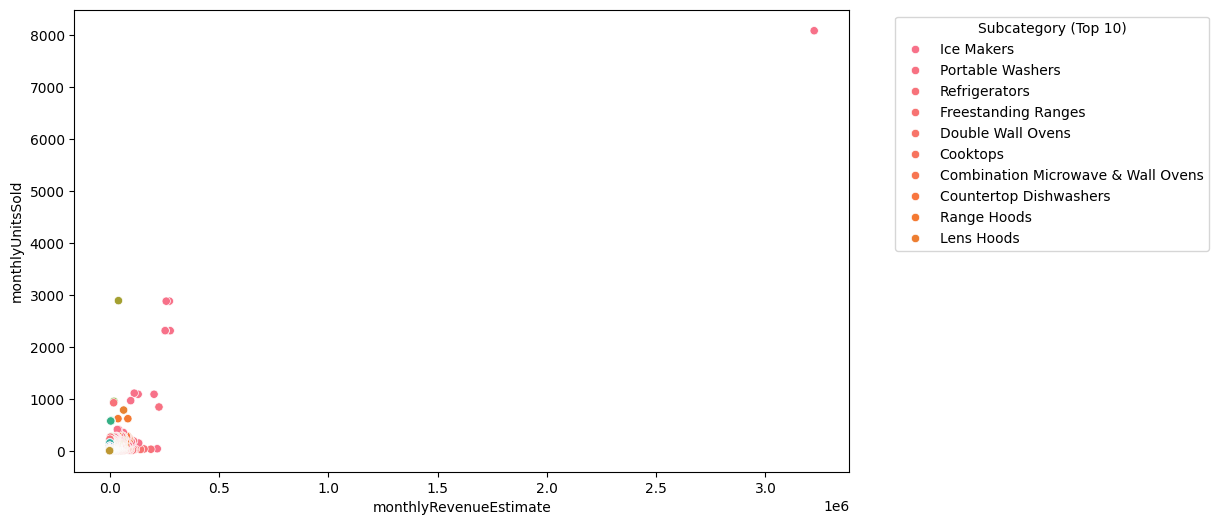

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when
from pyspark.sql.types import DoubleType
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Start Spark Session
spark = SparkSession.builder.appName("Amazon_EDA").getOrCreate()

# 2. Load dataset
df = spark.read.csv("21-Appliances.csv", header=True, inferSchema=True)

# 3. Preview schema and first few rows
df.show(5)

# 4. Select numeric columns only for summary statistics
numeric_cols = [
    "monthlyRevenueEstimate", "monthlyUnitsSold", "reviewCount", "reviewRating",
    "numberFbaSellers", "buyBoxPrice", "averageBuyBoxPrice", "buyBoxEquity",
    "revenueEquity", "marginEquity", "productPageScore", "totalRatings", "momGrowth"
]

df.select([col(c) for c in numeric_cols]).describe().show()

# 5. Detect missing values
missing = df.select([
    count(when(col(f"`{c}`").isNull(), c)).alias(c) if "." in c else count(when(col(c).isNull(), c)).alias(c)
    for c in df.columns
])
missing.show()

# 6. Drop rows with nulls in selected numeric columns
df_clean = df.dropna(subset=numeric_cols)

# Convert necessary columns to DoubleType (cast as numeric)
numeric_cols = ["monthlyRevenueEstimate", "monthlyUnitsSold", "buyBoxPrice", "averageBuyBoxPrice", "reviewRating", "revenueEquity", "marginEquity"]

for col_name in numeric_cols:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

# Drop rows with missing values in those columns
df_clean = df.dropna(subset=numeric_cols)

# Remove outliers based on quantiles for 'monthlyRevenueEstimate'
quantiles = df_clean.approxQuantile("monthlyRevenueEstimate", [0.01, 0.99], 0.01)

df_filtered = df_clean.filter(
    (col("monthlyRevenueEstimate") >= quantiles[0]) &
    (col("monthlyRevenueEstimate") <= quantiles[1])
)

# 8. Pattern: Avg & Std revenue by subcategory
df_filtered.groupBy(col("`subcategory.subcategoryName`")).agg(
    mean("monthlyRevenueEstimate").alias("Avg_Revenue"),
    stddev("monthlyRevenueEstimate").alias("Std_Revenue")
).show(truncate=False)

# 9. Anomaly Detection: High revenue but low monthly units
df_filtered.filter((col("monthlyRevenueEstimate") > 500000) &
                   (col("monthlyUnitsSold") < 10)).show()

# 10. Hypothesis Testing: Correlation between revenue and units sold
correlation = df_filtered.stat.corr("monthlyRevenueEstimate", "monthlyUnitsSold")
print("Correlation between Monthly Revenue and Units Sold:", correlation)

# 11. Visualization
pandas_df = df_filtered.select("monthlyRevenueEstimate", "monthlyUnitsSold", "`subcategory.subcategoryName`").toPandas()
# Plot
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x='monthlyRevenueEstimate', y='monthlyUnitsSold', hue='subcategory.subcategoryName', data=pandas_df)

# Keep only first N legend entries
N = 10  # Show only 10 subcategories
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[:N], labels=labels[:N], bbox_to_anchor=(1.05, 1), loc='upper left', title="Subcategory (Top 10)")


/tmp/ipython-input-12-15541490.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


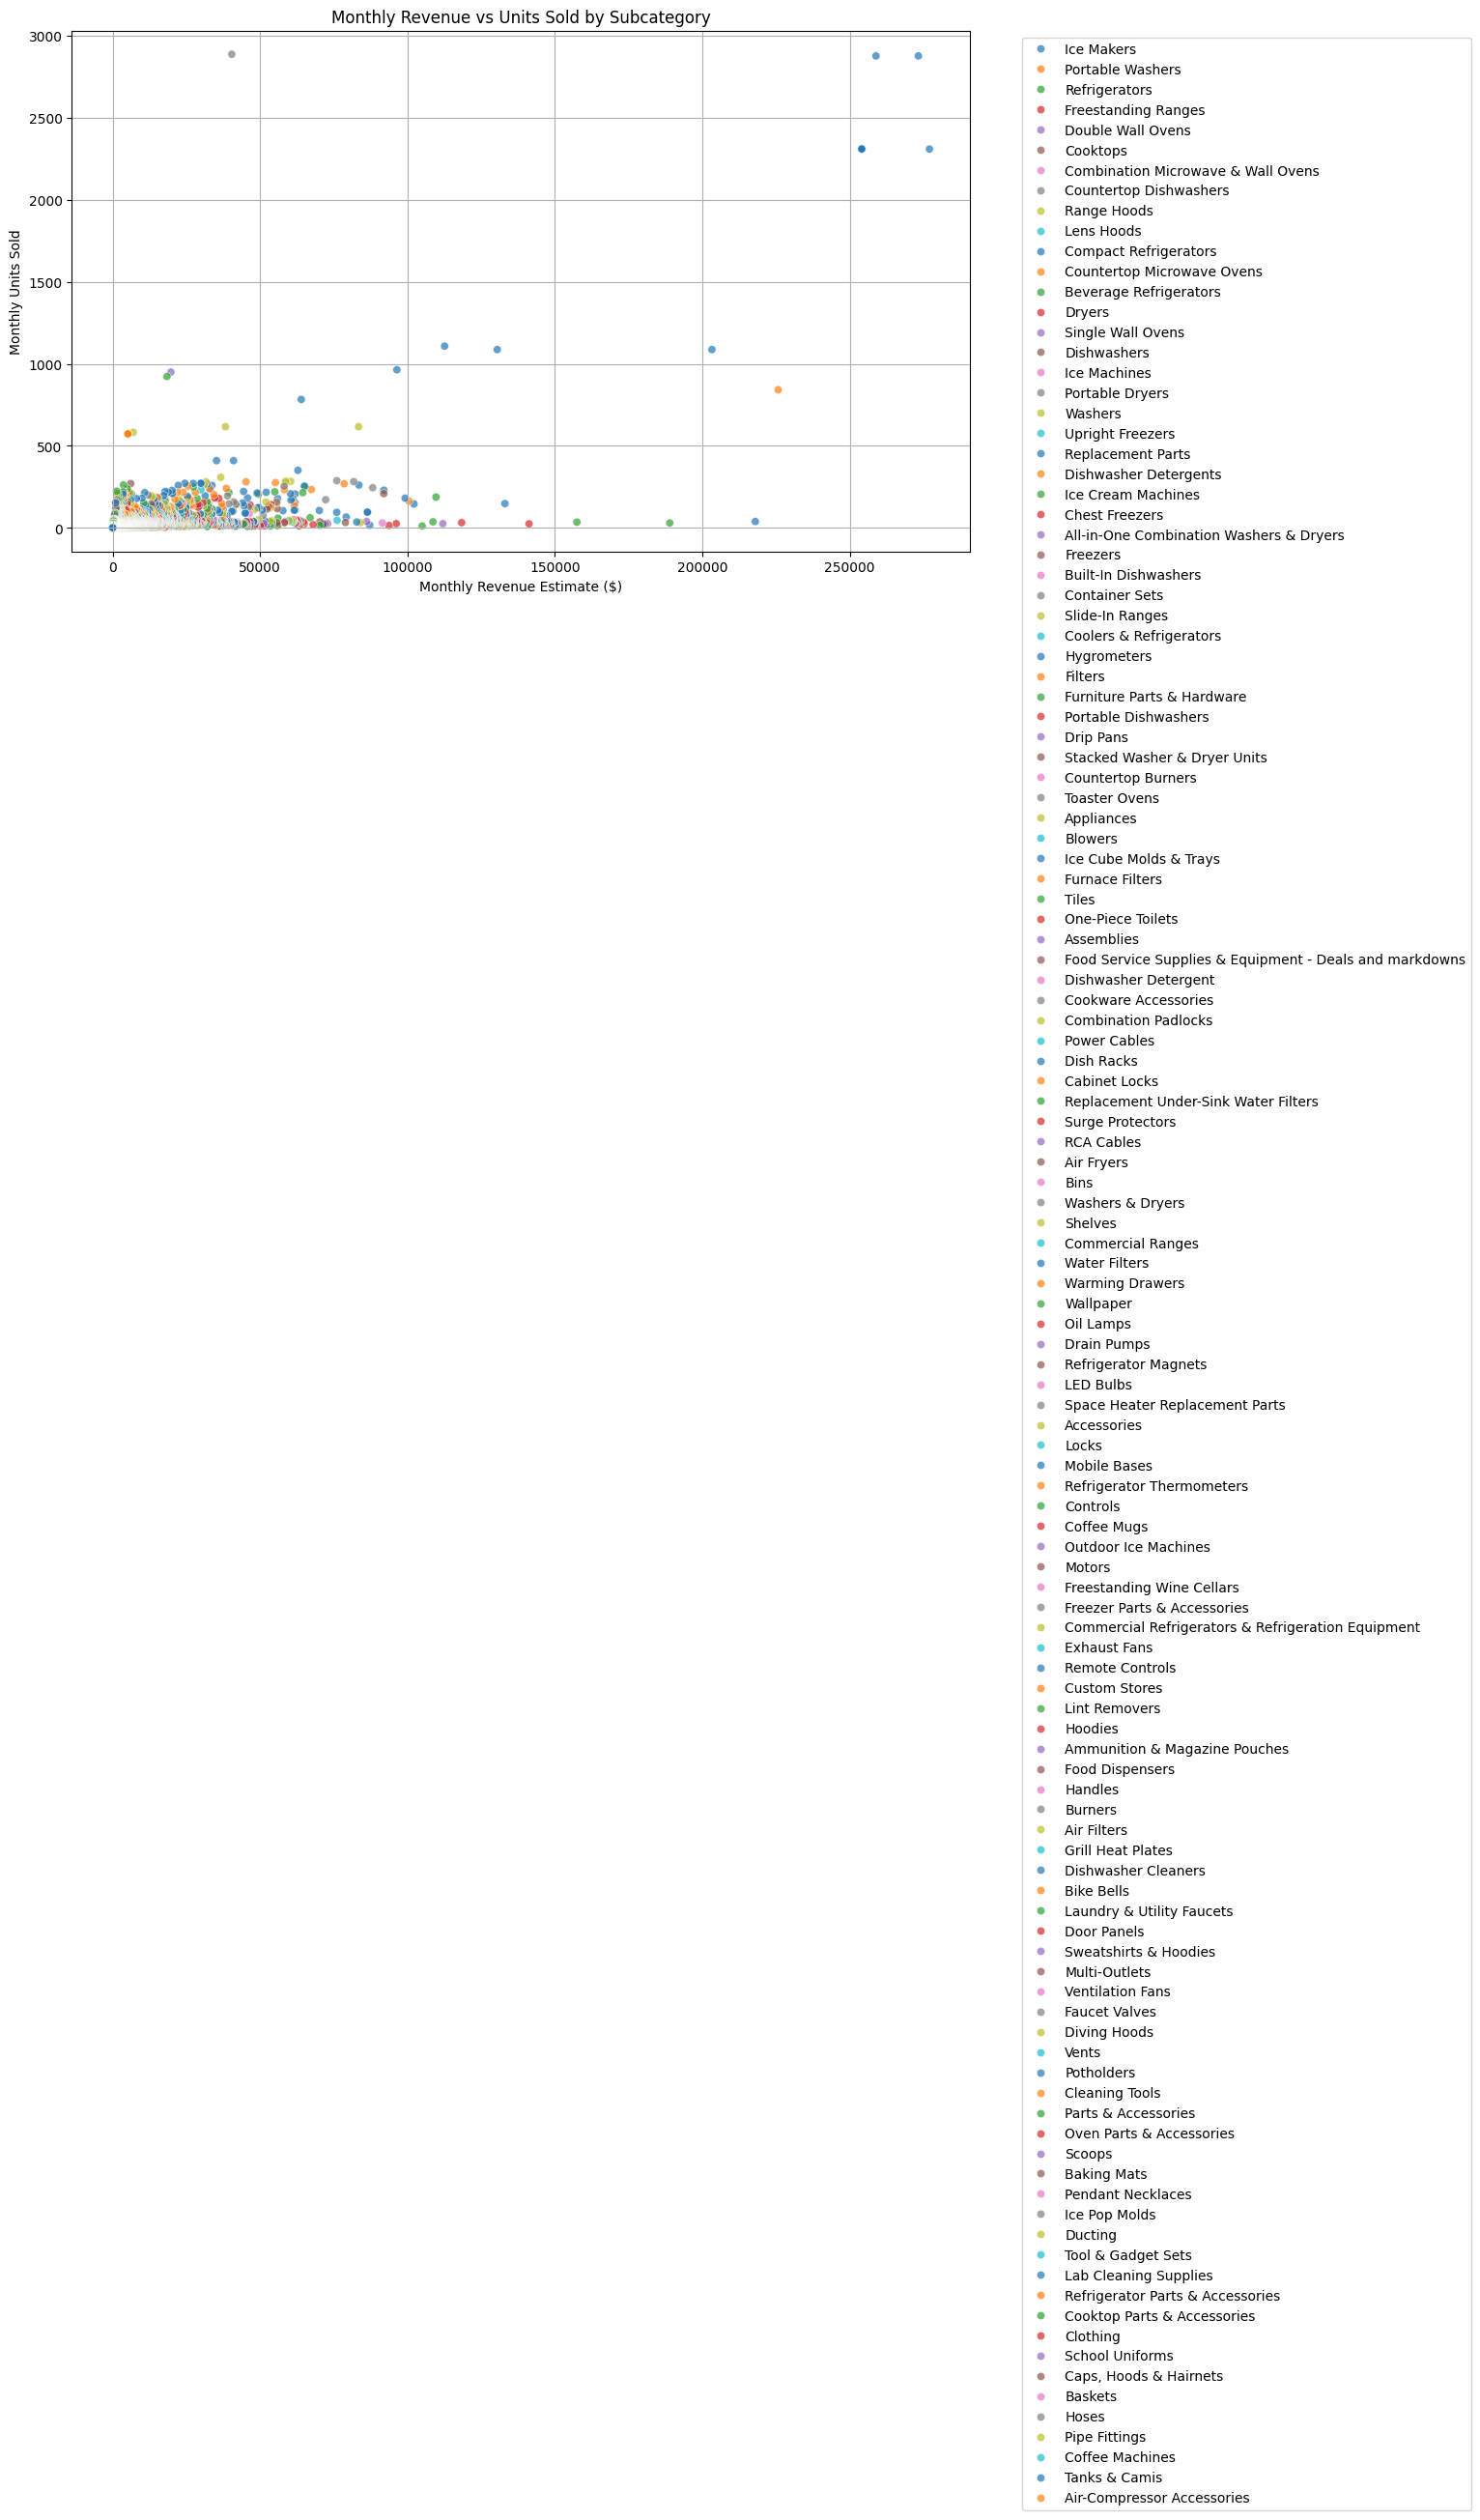

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Convert selected columns to Pandas safely (limit for performance)
pandas_df = df_filtered.select(
    "monthlyRevenueEstimate", "monthlyUnitsSold", "`subcategory.subcategoryName`"
).limit(10000).toPandas()  # Limit for performance

# Step 2: Drop rows with nulls to avoid errors in plotting
pandas_df.dropna(subset=["monthlyRevenueEstimate", "monthlyUnitsSold", "subcategory.subcategoryName"], inplace=True)

# Step 3: Filter out extreme outliers for cleaner plot
pandas_df = pandas_df[
    (pandas_df["monthlyRevenueEstimate"] < 1_000_000) &
    (pandas_df["monthlyUnitsSold"] < 20_000)
]

# Step 4: Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x="monthlyRevenueEstimate",
    y="monthlyUnitsSold",
    hue="subcategory.subcategoryName",
    data=pandas_df,
    palette="tab10",
    alpha=0.7
)
plt.title("Monthly Revenue vs Units Sold by Subcategory")
plt.xlabel("Monthly Revenue Estimate ($)")
plt.ylabel("Monthly Units Sold")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()


+-------+-------------+--------------------+----------+--------------------+----------+----------+---------------------------+----+---------+---------------+-----------+----------------------+----------+----------------+-------------------+-----------+------------+----------------+-----------+------------------+------------+-------------+------------+-------------+----------------+------------+------------+---------------+-----------+-------------+------------+---------+-----------+----+
|brandId|subcategoryId|            imageUrl|      asin|               title| brandName|categoryId|subcategory.subcategoryName|rank|amazonIsr|numberOfSellers|isVariation|monthlyRevenueEstimate|       ttm|monthlyUnitsSold|        listedSince|reviewCount|reviewRating|numberFbaSellers|buyBoxPrice|averageBuyBoxPrice|buyBoxEquity|revenueEquity|marginEquity|outOfStockNow|productPageScore|manufacturer|         upc|     partNumber|      model|numberOfItems|totalRatings|momGrowth|momGrowth12|note|
+-------+-----

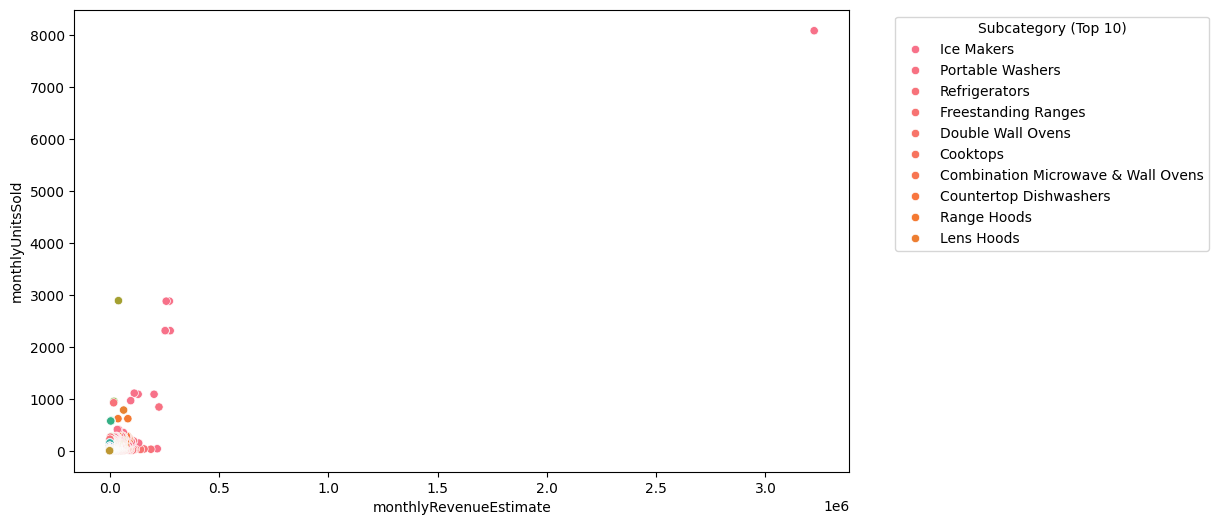

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when
from pyspark.sql.types import DoubleType
import seaborn as sns
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Amazon_EDA").getOrCreate()
df = spark.read.csv("21-Appliances.csv", header=True, inferSchema=True)
df.show(5)

numeric_cols = [
    "monthlyRevenueEstimate", "monthlyUnitsSold", "reviewCount", "reviewRating",
    "numberFbaSellers", "buyBoxPrice", "averageBuyBoxPrice", "buyBoxEquity",
    "revenueEquity", "marginEquity", "productPageScore", "totalRatings", "momGrowth"
]

df.select([col(c) for c in numeric_cols]).describe().show()

missing = df.select([
    count(when(col(f"`{c}`").isNull(), c)).alias(c) if "." in c else count(when(col(c).isNull(), c)).alias(c)
    for c in df.columns
])
missing.show()

df_clean = df.dropna(subset=numeric_cols)

numeric_cols = ["monthlyRevenueEstimate", "monthlyUnitsSold", "buyBoxPrice", "averageBuyBoxPrice", "reviewRating", "revenueEquity", "marginEquity"]

for col_name in numeric_cols:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

df_clean = df.dropna(subset=numeric_cols)

quantiles = df_clean.approxQuantile("monthlyRevenueEstimate", [0.01, 0.99], 0.01)

df_filtered = df_clean.filter(
    (col("monthlyRevenueEstimate") >= quantiles[0]) &
    (col("monthlyRevenueEstimate") <= quantiles[1])
)

df_filtered.groupBy(col("`subcategory.subcategoryName`")).agg(
    mean("monthlyRevenueEstimate").alias("Avg_Revenue"),
    stddev("monthlyRevenueEstimate").alias("Std_Revenue")
).show(truncate=False)

df_filtered.filter((col("monthlyRevenueEstimate") > 500000) &
                   (col("monthlyUnitsSold") < 10)).show()

correlation = df_filtered.stat.corr("monthlyRevenueEstimate", "monthlyUnitsSold")
print("Correlation between Monthly Revenue and Units Sold:", correlation)

pandas_df = df_filtered.select("monthlyRevenueEstimate", "monthlyUnitsSold", "`subcategory.subcategoryName`").toPandas()
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x='monthlyRevenueEstimate', y='monthlyUnitsSold', hue='subcategory.subcategoryName', data=pandas_df)
N = 10
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[:N], labels=labels[:N], bbox_to_anchor=(1.05, 1), loc='upper left', title="Subcategory (Top 10)")
